# PROJETO HOUSE ROCKET

## Entendimento do Negócio

1. Questão de negócio.
- O que você quer resolver ?
- Encontrar as melhores oportunidades de compra de imóveis do portfólio da House Rocket.

2. Premissas de negócio.
- O que você está assumindo para realizar o projeto ?
- Retirando casas com valor de venda maior que R$ 500.000.000,00 ( possível erro do sistema ).
- A média do preço das casas na região de Seattle é de R$ 300.000,00.
- Todas as casas estão em ótimas condições.

3. Planejamento da solução:
- Qual o seu plano para resolver o problema?

4. Os 5 principais insights dos dados:
- O que há de relevante nos dados que pode
ajudar o time de negócio à tomar decisão.

5. Resultados financeiros para o negócio:
- Quanto a empresa espera lucrar com a sua
solução ?

6. Conclusão:
- Seu objetivo inicial foi alcançado? Sim ? Não ?
Porque ?


### Tarefas
1. Criar 10 vizualizações para análise

1. Mapa com preços definindo o tamanho do identificador
2. filtros nos mapas
3. Varição de preço
4. Variação de tamanho
2. Contruir tabela de recomendações de compra e não compra
3. Construir tabela com recomendações de venda com acrescimo de 10 a 30 por cento
4. Fornecer hipóteses e a tabela no streamlit
5. Postar o projeto no Github com Readme


## Import Libraries

In [9]:
#import libraries

import pandas as pd
import numpy as np
import streamlit as st
import seaborn as sb

from matplotlib import gridspec
from matplotlib import pyplot     as plt
import ipywidgets     as widgets
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual

## Import Data

In [10]:
# import dataset
data = pd.read_csv(r'C:\Users\alexa\Documents\repos\python_0_ao_ds\kc_house_data.csv')

## Data Check

### Check Values, Types and NaN

In [11]:
# data dimension
print( 'Number of Rows:{}'.format( data.shape[0] ) )
print( 'Number of Columns {}'.format( data.shape[1] ) )
print(data.dtypes) 

Number of Rows:21613
Number of Columns 21
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [12]:
#transformation

#Convert variables to datetime
data['date'] = pd.to_datetime( data['date'], format='%Y-%m-%d' )
data[ 'yr_built' ] = pd.to_datetime( data [ 'yr_built' ], format = '%Y' )
data['yr_renovated'] = data['yr_renovated'].apply( lambda x: pd.to_datetime( x, format='%Y') if x > 0 else x )

#df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()


## Analyse Data and Create New variables

In [13]:
#Houses per price level
data['level'] = data['price'].apply( lambda x: 0 if x <= 321950 else
                                               1 if  ( x > 321950 ) & ( x <= 450000) else
                                               2 if  ( x > 450000 ) & ( x <= 645000) else '3' )

data['level'] = data['level'].astype(int)

In [14]:
#Houses per size in meters

data['meter_living'] = data['sqft_living'] * 0.09290304
data['size'] = data['meter_living'].apply( lambda x: 0 if x <= 132.57 else
                                                    1 if  ( x > 132.57 ) & ( x <= 177.44) else
                                                    2 if  ( x > 177.44 ) & ( x <= 236.90) else '3' )

data['size'] = data['size'].astype(int)

In [15]:
# Calcular o preço por metro quadrado do apartamento
data['price_per_meter'] = data['price'] / data['meter_living']

#### Get Address info

Disponibilizar endereço no APP

In [31]:
#Geopy para coletar os dados para média por bairro
#from geopy.geocoders import Nominatim
#import geopy.geocoders
#geopy.geocoders.options.default_timeout = 1500
# initializa API

#geolocator = Nominatim( user_agent='openstreetmap')

# Create empty rows
#data.loc[:, 'neighbourhood '] = 'NA'
#data.loc[:,'postcode'] = 'NA'

#for i in range( len( data ) ):
#    print( 'Loop: {}/{}'.format( i, len( data ) ) )
 #   # make request
  #  query = str( data.loc[i, 'lat'] ) + ',' + str( data.loc[i, 'long'] )
   # response = geolocator.reverse( query )

    # parse data         #
 #   if 'postcode' in response.raw['address']:
  #      data.loc[i, 'postcode'] = response.raw['address']['postcode']      

# data dimension
#print( 'Number of Rows:{}'.format( data.shape[0] ) )
#print( 'Number of Columns {}'.format( data.shape[1] ) )

Loop: 0/21613
Loop: 1/21613
Loop: 2/21613
Loop: 3/21613
Loop: 4/21613
Loop: 5/21613
Loop: 6/21613
Loop: 7/21613
Loop: 8/21613
Loop: 9/21613
Loop: 10/21613
Loop: 11/21613
Loop: 12/21613
Loop: 13/21613
Loop: 14/21613
Loop: 15/21613
Loop: 16/21613
Loop: 17/21613
Loop: 18/21613
Loop: 19/21613
Loop: 20/21613
Loop: 21/21613
Loop: 22/21613
Loop: 23/21613
Loop: 24/21613
Loop: 25/21613
Loop: 26/21613
Loop: 27/21613
Loop: 28/21613
Loop: 29/21613
Loop: 30/21613
Loop: 31/21613
Loop: 32/21613
Loop: 33/21613
Loop: 34/21613
Loop: 35/21613
Loop: 36/21613
Loop: 37/21613
Loop: 38/21613
Loop: 39/21613
Loop: 40/21613
Loop: 41/21613
Loop: 42/21613
Loop: 43/21613
Loop: 44/21613
Loop: 45/21613
Loop: 46/21613
Loop: 47/21613
Loop: 48/21613
Loop: 49/21613
Loop: 50/21613
Loop: 51/21613
Loop: 52/21613
Loop: 53/21613
Loop: 54/21613
Loop: 55/21613
Loop: 56/21613
Loop: 57/21613
Loop: 58/21613
Loop: 59/21613
Loop: 60/21613
Loop: 61/21613
Loop: 62/21613
Loop: 63/21613
Loop: 64/21613
Loop: 65/21613
Loop: 66/21613
Loop:

Loop: 519/21613
Loop: 520/21613
Loop: 521/21613
Loop: 522/21613
Loop: 523/21613
Loop: 524/21613
Loop: 525/21613
Loop: 526/21613
Loop: 527/21613
Loop: 528/21613
Loop: 529/21613
Loop: 530/21613
Loop: 531/21613
Loop: 532/21613
Loop: 533/21613
Loop: 534/21613
Loop: 535/21613
Loop: 536/21613
Loop: 537/21613
Loop: 538/21613
Loop: 539/21613
Loop: 540/21613
Loop: 541/21613
Loop: 542/21613
Loop: 543/21613
Loop: 544/21613
Loop: 545/21613
Loop: 546/21613
Loop: 547/21613
Loop: 548/21613
Loop: 549/21613
Loop: 550/21613
Loop: 551/21613
Loop: 552/21613
Loop: 553/21613
Loop: 554/21613
Loop: 555/21613
Loop: 556/21613
Loop: 557/21613
Loop: 558/21613
Loop: 559/21613
Loop: 560/21613
Loop: 561/21613
Loop: 562/21613
Loop: 563/21613
Loop: 564/21613
Loop: 565/21613
Loop: 566/21613
Loop: 567/21613
Loop: 568/21613
Loop: 569/21613
Loop: 570/21613
Loop: 571/21613
Loop: 572/21613
Loop: 573/21613
Loop: 574/21613
Loop: 575/21613
Loop: 576/21613
Loop: 577/21613
Loop: 578/21613
Loop: 579/21613
Loop: 580/21613
Loop: 58

Loop: 1030/21613
Loop: 1031/21613
Loop: 1032/21613
Loop: 1033/21613
Loop: 1034/21613
Loop: 1035/21613
Loop: 1036/21613
Loop: 1037/21613
Loop: 1038/21613
Loop: 1039/21613
Loop: 1040/21613
Loop: 1041/21613
Loop: 1042/21613
Loop: 1043/21613
Loop: 1044/21613
Loop: 1045/21613
Loop: 1046/21613
Loop: 1047/21613
Loop: 1048/21613
Loop: 1049/21613
Loop: 1050/21613
Loop: 1051/21613
Loop: 1052/21613
Loop: 1053/21613
Loop: 1054/21613
Loop: 1055/21613
Loop: 1056/21613
Loop: 1057/21613
Loop: 1058/21613
Loop: 1059/21613
Loop: 1060/21613
Loop: 1061/21613
Loop: 1062/21613
Loop: 1063/21613
Loop: 1064/21613
Loop: 1065/21613
Loop: 1066/21613
Loop: 1067/21613
Loop: 1068/21613
Loop: 1069/21613
Loop: 1070/21613
Loop: 1071/21613
Loop: 1072/21613
Loop: 1073/21613
Loop: 1074/21613
Loop: 1075/21613
Loop: 1076/21613
Loop: 1077/21613
Loop: 1078/21613
Loop: 1079/21613
Loop: 1080/21613
Loop: 1081/21613
Loop: 1082/21613
Loop: 1083/21613
Loop: 1084/21613
Loop: 1085/21613
Loop: 1086/21613
Loop: 1087/21613
Loop: 1088/216

Loop: 1512/21613
Loop: 1513/21613
Loop: 1514/21613
Loop: 1515/21613
Loop: 1516/21613
Loop: 1517/21613
Loop: 1518/21613
Loop: 1519/21613
Loop: 1520/21613
Loop: 1521/21613
Loop: 1522/21613
Loop: 1523/21613
Loop: 1524/21613
Loop: 1525/21613
Loop: 1526/21613
Loop: 1527/21613
Loop: 1528/21613
Loop: 1529/21613
Loop: 1530/21613
Loop: 1531/21613
Loop: 1532/21613
Loop: 1533/21613
Loop: 1534/21613
Loop: 1535/21613
Loop: 1536/21613
Loop: 1537/21613
Loop: 1538/21613
Loop: 1539/21613
Loop: 1540/21613
Loop: 1541/21613
Loop: 1542/21613
Loop: 1543/21613
Loop: 1544/21613
Loop: 1545/21613
Loop: 1546/21613
Loop: 1547/21613
Loop: 1548/21613
Loop: 1549/21613
Loop: 1550/21613
Loop: 1551/21613
Loop: 1552/21613
Loop: 1553/21613
Loop: 1554/21613
Loop: 1555/21613
Loop: 1556/21613
Loop: 1557/21613
Loop: 1558/21613
Loop: 1559/21613
Loop: 1560/21613
Loop: 1561/21613
Loop: 1562/21613
Loop: 1563/21613
Loop: 1564/21613
Loop: 1565/21613
Loop: 1566/21613
Loop: 1567/21613
Loop: 1568/21613
Loop: 1569/21613
Loop: 1570/216

Loop: 1994/21613
Loop: 1995/21613
Loop: 1996/21613
Loop: 1997/21613
Loop: 1998/21613
Loop: 1999/21613
Loop: 2000/21613
Loop: 2001/21613
Loop: 2002/21613
Loop: 2003/21613
Loop: 2004/21613
Loop: 2005/21613
Loop: 2006/21613
Loop: 2007/21613
Loop: 2008/21613
Loop: 2009/21613
Loop: 2010/21613
Loop: 2011/21613
Loop: 2012/21613
Loop: 2013/21613
Loop: 2014/21613
Loop: 2015/21613
Loop: 2016/21613
Loop: 2017/21613
Loop: 2018/21613
Loop: 2019/21613
Loop: 2020/21613
Loop: 2021/21613
Loop: 2022/21613
Loop: 2023/21613
Loop: 2024/21613
Loop: 2025/21613
Loop: 2026/21613
Loop: 2027/21613
Loop: 2028/21613
Loop: 2029/21613
Loop: 2030/21613
Loop: 2031/21613
Loop: 2032/21613
Loop: 2033/21613
Loop: 2034/21613
Loop: 2035/21613
Loop: 2036/21613
Loop: 2037/21613
Loop: 2038/21613
Loop: 2039/21613
Loop: 2040/21613
Loop: 2041/21613
Loop: 2042/21613
Loop: 2043/21613
Loop: 2044/21613
Loop: 2045/21613
Loop: 2046/21613
Loop: 2047/21613
Loop: 2048/21613
Loop: 2049/21613
Loop: 2050/21613
Loop: 2051/21613
Loop: 2052/216

Loop: 2476/21613
Loop: 2477/21613
Loop: 2478/21613
Loop: 2479/21613
Loop: 2480/21613
Loop: 2481/21613
Loop: 2482/21613
Loop: 2483/21613
Loop: 2484/21613
Loop: 2485/21613
Loop: 2486/21613
Loop: 2487/21613
Loop: 2488/21613
Loop: 2489/21613
Loop: 2490/21613
Loop: 2491/21613
Loop: 2492/21613
Loop: 2493/21613
Loop: 2494/21613
Loop: 2495/21613
Loop: 2496/21613
Loop: 2497/21613
Loop: 2498/21613
Loop: 2499/21613
Loop: 2500/21613
Loop: 2501/21613
Loop: 2502/21613
Loop: 2503/21613
Loop: 2504/21613
Loop: 2505/21613
Loop: 2506/21613
Loop: 2507/21613
Loop: 2508/21613
Loop: 2509/21613
Loop: 2510/21613
Loop: 2511/21613
Loop: 2512/21613
Loop: 2513/21613
Loop: 2514/21613
Loop: 2515/21613
Loop: 2516/21613
Loop: 2517/21613
Loop: 2518/21613
Loop: 2519/21613
Loop: 2520/21613
Loop: 2521/21613
Loop: 2522/21613
Loop: 2523/21613
Loop: 2524/21613
Loop: 2525/21613
Loop: 2526/21613
Loop: 2527/21613
Loop: 2528/21613
Loop: 2529/21613
Loop: 2530/21613
Loop: 2531/21613
Loop: 2532/21613
Loop: 2533/21613
Loop: 2534/216

Loop: 2958/21613
Loop: 2959/21613
Loop: 2960/21613
Loop: 2961/21613
Loop: 2962/21613
Loop: 2963/21613
Loop: 2964/21613
Loop: 2965/21613
Loop: 2966/21613
Loop: 2967/21613
Loop: 2968/21613
Loop: 2969/21613
Loop: 2970/21613
Loop: 2971/21613
Loop: 2972/21613
Loop: 2973/21613
Loop: 2974/21613
Loop: 2975/21613
Loop: 2976/21613
Loop: 2977/21613
Loop: 2978/21613
Loop: 2979/21613
Loop: 2980/21613
Loop: 2981/21613
Loop: 2982/21613
Loop: 2983/21613
Loop: 2984/21613
Loop: 2985/21613
Loop: 2986/21613
Loop: 2987/21613
Loop: 2988/21613
Loop: 2989/21613
Loop: 2990/21613
Loop: 2991/21613
Loop: 2992/21613
Loop: 2993/21613
Loop: 2994/21613
Loop: 2995/21613
Loop: 2996/21613
Loop: 2997/21613
Loop: 2998/21613
Loop: 2999/21613
Loop: 3000/21613
Loop: 3001/21613
Loop: 3002/21613
Loop: 3003/21613
Loop: 3004/21613
Loop: 3005/21613
Loop: 3006/21613
Loop: 3007/21613
Loop: 3008/21613
Loop: 3009/21613
Loop: 3010/21613
Loop: 3011/21613
Loop: 3012/21613
Loop: 3013/21613
Loop: 3014/21613
Loop: 3015/21613
Loop: 3016/216

Loop: 3440/21613
Loop: 3441/21613
Loop: 3442/21613
Loop: 3443/21613
Loop: 3444/21613
Loop: 3445/21613
Loop: 3446/21613
Loop: 3447/21613
Loop: 3448/21613
Loop: 3449/21613
Loop: 3450/21613
Loop: 3451/21613
Loop: 3452/21613
Loop: 3453/21613
Loop: 3454/21613
Loop: 3455/21613
Loop: 3456/21613
Loop: 3457/21613
Loop: 3458/21613
Loop: 3459/21613
Loop: 3460/21613
Loop: 3461/21613
Loop: 3462/21613
Loop: 3463/21613
Loop: 3464/21613
Loop: 3465/21613
Loop: 3466/21613
Loop: 3467/21613
Loop: 3468/21613
Loop: 3469/21613
Loop: 3470/21613
Loop: 3471/21613
Loop: 3472/21613
Loop: 3473/21613
Loop: 3474/21613
Loop: 3475/21613
Loop: 3476/21613
Loop: 3477/21613
Loop: 3478/21613
Loop: 3479/21613
Loop: 3480/21613
Loop: 3481/21613
Loop: 3482/21613
Loop: 3483/21613
Loop: 3484/21613
Loop: 3485/21613
Loop: 3486/21613
Loop: 3487/21613
Loop: 3488/21613
Loop: 3489/21613
Loop: 3490/21613
Loop: 3491/21613
Loop: 3492/21613
Loop: 3493/21613
Loop: 3494/21613
Loop: 3495/21613
Loop: 3496/21613
Loop: 3497/21613
Loop: 3498/216

Loop: 3922/21613
Loop: 3923/21613
Loop: 3924/21613
Loop: 3925/21613
Loop: 3926/21613
Loop: 3927/21613
Loop: 3928/21613
Loop: 3929/21613
Loop: 3930/21613
Loop: 3931/21613
Loop: 3932/21613
Loop: 3933/21613
Loop: 3934/21613
Loop: 3935/21613
Loop: 3936/21613
Loop: 3937/21613
Loop: 3938/21613
Loop: 3939/21613
Loop: 3940/21613
Loop: 3941/21613
Loop: 3942/21613
Loop: 3943/21613
Loop: 3944/21613
Loop: 3945/21613
Loop: 3946/21613
Loop: 3947/21613
Loop: 3948/21613
Loop: 3949/21613
Loop: 3950/21613
Loop: 3951/21613
Loop: 3952/21613
Loop: 3953/21613
Loop: 3954/21613
Loop: 3955/21613
Loop: 3956/21613
Loop: 3957/21613
Loop: 3958/21613
Loop: 3959/21613
Loop: 3960/21613
Loop: 3961/21613
Loop: 3962/21613
Loop: 3963/21613
Loop: 3964/21613
Loop: 3965/21613
Loop: 3966/21613
Loop: 3967/21613
Loop: 3968/21613
Loop: 3969/21613
Loop: 3970/21613
Loop: 3971/21613
Loop: 3972/21613
Loop: 3973/21613
Loop: 3974/21613
Loop: 3975/21613
Loop: 3976/21613
Loop: 3977/21613
Loop: 3978/21613
Loop: 3979/21613
Loop: 3980/216

Loop: 4404/21613
Loop: 4405/21613
Loop: 4406/21613
Loop: 4407/21613
Loop: 4408/21613
Loop: 4409/21613
Loop: 4410/21613
Loop: 4411/21613
Loop: 4412/21613
Loop: 4413/21613
Loop: 4414/21613
Loop: 4415/21613
Loop: 4416/21613
Loop: 4417/21613
Loop: 4418/21613
Loop: 4419/21613
Loop: 4420/21613
Loop: 4421/21613
Loop: 4422/21613
Loop: 4423/21613
Loop: 4424/21613
Loop: 4425/21613
Loop: 4426/21613
Loop: 4427/21613
Loop: 4428/21613
Loop: 4429/21613
Loop: 4430/21613
Loop: 4431/21613
Loop: 4432/21613
Loop: 4433/21613
Loop: 4434/21613
Loop: 4435/21613
Loop: 4436/21613
Loop: 4437/21613
Loop: 4438/21613
Loop: 4439/21613
Loop: 4440/21613
Loop: 4441/21613
Loop: 4442/21613
Loop: 4443/21613
Loop: 4444/21613
Loop: 4445/21613
Loop: 4446/21613
Loop: 4447/21613
Loop: 4448/21613
Loop: 4449/21613
Loop: 4450/21613
Loop: 4451/21613
Loop: 4452/21613
Loop: 4453/21613
Loop: 4454/21613
Loop: 4455/21613
Loop: 4456/21613
Loop: 4457/21613
Loop: 4458/21613
Loop: 4459/21613
Loop: 4460/21613
Loop: 4461/21613
Loop: 4462/216

Loop: 4886/21613
Loop: 4887/21613
Loop: 4888/21613
Loop: 4889/21613
Loop: 4890/21613
Loop: 4891/21613
Loop: 4892/21613
Loop: 4893/21613
Loop: 4894/21613
Loop: 4895/21613
Loop: 4896/21613
Loop: 4897/21613
Loop: 4898/21613
Loop: 4899/21613
Loop: 4900/21613
Loop: 4901/21613
Loop: 4902/21613
Loop: 4903/21613
Loop: 4904/21613
Loop: 4905/21613
Loop: 4906/21613
Loop: 4907/21613
Loop: 4908/21613
Loop: 4909/21613
Loop: 4910/21613
Loop: 4911/21613
Loop: 4912/21613
Loop: 4913/21613
Loop: 4914/21613
Loop: 4915/21613
Loop: 4916/21613
Loop: 4917/21613
Loop: 4918/21613
Loop: 4919/21613
Loop: 4920/21613
Loop: 4921/21613
Loop: 4922/21613
Loop: 4923/21613
Loop: 4924/21613
Loop: 4925/21613
Loop: 4926/21613
Loop: 4927/21613
Loop: 4928/21613
Loop: 4929/21613
Loop: 4930/21613
Loop: 4931/21613
Loop: 4932/21613
Loop: 4933/21613
Loop: 4934/21613
Loop: 4935/21613
Loop: 4936/21613
Loop: 4937/21613
Loop: 4938/21613
Loop: 4939/21613
Loop: 4940/21613
Loop: 4941/21613
Loop: 4942/21613
Loop: 4943/21613
Loop: 4944/216

Loop: 5368/21613
Loop: 5369/21613
Loop: 5370/21613
Loop: 5371/21613
Loop: 5372/21613
Loop: 5373/21613
Loop: 5374/21613
Loop: 5375/21613
Loop: 5376/21613
Loop: 5377/21613
Loop: 5378/21613
Loop: 5379/21613
Loop: 5380/21613
Loop: 5381/21613
Loop: 5382/21613
Loop: 5383/21613
Loop: 5384/21613
Loop: 5385/21613
Loop: 5386/21613
Loop: 5387/21613
Loop: 5388/21613
Loop: 5389/21613
Loop: 5390/21613
Loop: 5391/21613
Loop: 5392/21613
Loop: 5393/21613
Loop: 5394/21613
Loop: 5395/21613
Loop: 5396/21613
Loop: 5397/21613
Loop: 5398/21613
Loop: 5399/21613
Loop: 5400/21613
Loop: 5401/21613
Loop: 5402/21613
Loop: 5403/21613
Loop: 5404/21613
Loop: 5405/21613
Loop: 5406/21613
Loop: 5407/21613
Loop: 5408/21613
Loop: 5409/21613
Loop: 5410/21613
Loop: 5411/21613
Loop: 5412/21613
Loop: 5413/21613
Loop: 5414/21613
Loop: 5415/21613
Loop: 5416/21613
Loop: 5417/21613
Loop: 5418/21613
Loop: 5419/21613
Loop: 5420/21613
Loop: 5421/21613
Loop: 5422/21613
Loop: 5423/21613
Loop: 5424/21613
Loop: 5425/21613
Loop: 5426/216

Loop: 5850/21613
Loop: 5851/21613
Loop: 5852/21613
Loop: 5853/21613
Loop: 5854/21613
Loop: 5855/21613
Loop: 5856/21613
Loop: 5857/21613
Loop: 5858/21613
Loop: 5859/21613
Loop: 5860/21613
Loop: 5861/21613
Loop: 5862/21613
Loop: 5863/21613
Loop: 5864/21613
Loop: 5865/21613
Loop: 5866/21613
Loop: 5867/21613
Loop: 5868/21613
Loop: 5869/21613
Loop: 5870/21613
Loop: 5871/21613
Loop: 5872/21613
Loop: 5873/21613
Loop: 5874/21613
Loop: 5875/21613
Loop: 5876/21613
Loop: 5877/21613
Loop: 5878/21613
Loop: 5879/21613
Loop: 5880/21613
Loop: 5881/21613
Loop: 5882/21613
Loop: 5883/21613
Loop: 5884/21613
Loop: 5885/21613
Loop: 5886/21613
Loop: 5887/21613
Loop: 5888/21613
Loop: 5889/21613
Loop: 5890/21613
Loop: 5891/21613
Loop: 5892/21613
Loop: 5893/21613
Loop: 5894/21613
Loop: 5895/21613
Loop: 5896/21613
Loop: 5897/21613
Loop: 5898/21613
Loop: 5899/21613
Loop: 5900/21613
Loop: 5901/21613
Loop: 5902/21613
Loop: 5903/21613
Loop: 5904/21613
Loop: 5905/21613
Loop: 5906/21613
Loop: 5907/21613
Loop: 5908/216

Loop: 6332/21613
Loop: 6333/21613
Loop: 6334/21613
Loop: 6335/21613
Loop: 6336/21613
Loop: 6337/21613
Loop: 6338/21613
Loop: 6339/21613
Loop: 6340/21613
Loop: 6341/21613
Loop: 6342/21613
Loop: 6343/21613
Loop: 6344/21613
Loop: 6345/21613
Loop: 6346/21613
Loop: 6347/21613
Loop: 6348/21613
Loop: 6349/21613
Loop: 6350/21613
Loop: 6351/21613
Loop: 6352/21613
Loop: 6353/21613
Loop: 6354/21613
Loop: 6355/21613
Loop: 6356/21613
Loop: 6357/21613
Loop: 6358/21613
Loop: 6359/21613
Loop: 6360/21613
Loop: 6361/21613
Loop: 6362/21613
Loop: 6363/21613
Loop: 6364/21613
Loop: 6365/21613
Loop: 6366/21613
Loop: 6367/21613
Loop: 6368/21613
Loop: 6369/21613
Loop: 6370/21613
Loop: 6371/21613
Loop: 6372/21613
Loop: 6373/21613
Loop: 6374/21613
Loop: 6375/21613
Loop: 6376/21613
Loop: 6377/21613
Loop: 6378/21613
Loop: 6379/21613
Loop: 6380/21613
Loop: 6381/21613
Loop: 6382/21613
Loop: 6383/21613
Loop: 6384/21613
Loop: 6385/21613
Loop: 6386/21613
Loop: 6387/21613
Loop: 6388/21613
Loop: 6389/21613
Loop: 6390/216

Loop: 6814/21613
Loop: 6815/21613
Loop: 6816/21613
Loop: 6817/21613
Loop: 6818/21613
Loop: 6819/21613
Loop: 6820/21613
Loop: 6821/21613
Loop: 6822/21613
Loop: 6823/21613
Loop: 6824/21613
Loop: 6825/21613
Loop: 6826/21613
Loop: 6827/21613
Loop: 6828/21613
Loop: 6829/21613
Loop: 6830/21613
Loop: 6831/21613
Loop: 6832/21613
Loop: 6833/21613
Loop: 6834/21613
Loop: 6835/21613
Loop: 6836/21613
Loop: 6837/21613
Loop: 6838/21613
Loop: 6839/21613
Loop: 6840/21613
Loop: 6841/21613
Loop: 6842/21613
Loop: 6843/21613
Loop: 6844/21613
Loop: 6845/21613
Loop: 6846/21613
Loop: 6847/21613
Loop: 6848/21613
Loop: 6849/21613
Loop: 6850/21613
Loop: 6851/21613
Loop: 6852/21613
Loop: 6853/21613
Loop: 6854/21613
Loop: 6855/21613
Loop: 6856/21613
Loop: 6857/21613
Loop: 6858/21613
Loop: 6859/21613
Loop: 6860/21613
Loop: 6861/21613
Loop: 6862/21613
Loop: 6863/21613
Loop: 6864/21613
Loop: 6865/21613
Loop: 6866/21613
Loop: 6867/21613
Loop: 6868/21613
Loop: 6869/21613
Loop: 6870/21613
Loop: 6871/21613
Loop: 6872/216

Loop: 7296/21613
Loop: 7297/21613
Loop: 7298/21613
Loop: 7299/21613
Loop: 7300/21613
Loop: 7301/21613
Loop: 7302/21613
Loop: 7303/21613
Loop: 7304/21613
Loop: 7305/21613
Loop: 7306/21613
Loop: 7307/21613
Loop: 7308/21613
Loop: 7309/21613
Loop: 7310/21613
Loop: 7311/21613
Loop: 7312/21613
Loop: 7313/21613
Loop: 7314/21613
Loop: 7315/21613
Loop: 7316/21613
Loop: 7317/21613
Loop: 7318/21613
Loop: 7319/21613
Loop: 7320/21613
Loop: 7321/21613
Loop: 7322/21613
Loop: 7323/21613
Loop: 7324/21613
Loop: 7325/21613
Loop: 7326/21613
Loop: 7327/21613
Loop: 7328/21613
Loop: 7329/21613
Loop: 7330/21613
Loop: 7331/21613
Loop: 7332/21613
Loop: 7333/21613
Loop: 7334/21613
Loop: 7335/21613
Loop: 7336/21613
Loop: 7337/21613
Loop: 7338/21613
Loop: 7339/21613
Loop: 7340/21613
Loop: 7341/21613
Loop: 7342/21613
Loop: 7343/21613
Loop: 7344/21613
Loop: 7345/21613
Loop: 7346/21613
Loop: 7347/21613
Loop: 7348/21613
Loop: 7349/21613
Loop: 7350/21613
Loop: 7351/21613
Loop: 7352/21613
Loop: 7353/21613
Loop: 7354/216

Loop: 7778/21613
Loop: 7779/21613
Loop: 7780/21613
Loop: 7781/21613
Loop: 7782/21613
Loop: 7783/21613
Loop: 7784/21613
Loop: 7785/21613
Loop: 7786/21613
Loop: 7787/21613
Loop: 7788/21613
Loop: 7789/21613
Loop: 7790/21613
Loop: 7791/21613
Loop: 7792/21613
Loop: 7793/21613
Loop: 7794/21613
Loop: 7795/21613
Loop: 7796/21613
Loop: 7797/21613
Loop: 7798/21613
Loop: 7799/21613
Loop: 7800/21613
Loop: 7801/21613
Loop: 7802/21613
Loop: 7803/21613
Loop: 7804/21613
Loop: 7805/21613
Loop: 7806/21613
Loop: 7807/21613
Loop: 7808/21613
Loop: 7809/21613
Loop: 7810/21613
Loop: 7811/21613
Loop: 7812/21613
Loop: 7813/21613
Loop: 7814/21613
Loop: 7815/21613
Loop: 7816/21613
Loop: 7817/21613
Loop: 7818/21613
Loop: 7819/21613
Loop: 7820/21613
Loop: 7821/21613
Loop: 7822/21613
Loop: 7823/21613
Loop: 7824/21613
Loop: 7825/21613
Loop: 7826/21613
Loop: 7827/21613
Loop: 7828/21613
Loop: 7829/21613
Loop: 7830/21613
Loop: 7831/21613
Loop: 7832/21613
Loop: 7833/21613
Loop: 7834/21613
Loop: 7835/21613
Loop: 7836/216

Loop: 8260/21613
Loop: 8261/21613
Loop: 8262/21613
Loop: 8263/21613
Loop: 8264/21613
Loop: 8265/21613
Loop: 8266/21613
Loop: 8267/21613
Loop: 8268/21613
Loop: 8269/21613
Loop: 8270/21613
Loop: 8271/21613
Loop: 8272/21613
Loop: 8273/21613
Loop: 8274/21613
Loop: 8275/21613
Loop: 8276/21613
Loop: 8277/21613
Loop: 8278/21613
Loop: 8279/21613
Loop: 8280/21613
Loop: 8281/21613
Loop: 8282/21613
Loop: 8283/21613
Loop: 8284/21613
Loop: 8285/21613
Loop: 8286/21613
Loop: 8287/21613
Loop: 8288/21613
Loop: 8289/21613
Loop: 8290/21613
Loop: 8291/21613
Loop: 8292/21613
Loop: 8293/21613
Loop: 8294/21613
Loop: 8295/21613
Loop: 8296/21613
Loop: 8297/21613
Loop: 8298/21613
Loop: 8299/21613
Loop: 8300/21613
Loop: 8301/21613
Loop: 8302/21613
Loop: 8303/21613
Loop: 8304/21613
Loop: 8305/21613
Loop: 8306/21613
Loop: 8307/21613
Loop: 8308/21613
Loop: 8309/21613
Loop: 8310/21613
Loop: 8311/21613
Loop: 8312/21613
Loop: 8313/21613
Loop: 8314/21613
Loop: 8315/21613
Loop: 8316/21613
Loop: 8317/21613
Loop: 8318/216

Loop: 8742/21613
Loop: 8743/21613
Loop: 8744/21613
Loop: 8745/21613
Loop: 8746/21613
Loop: 8747/21613
Loop: 8748/21613
Loop: 8749/21613
Loop: 8750/21613
Loop: 8751/21613
Loop: 8752/21613
Loop: 8753/21613
Loop: 8754/21613
Loop: 8755/21613
Loop: 8756/21613
Loop: 8757/21613
Loop: 8758/21613
Loop: 8759/21613
Loop: 8760/21613
Loop: 8761/21613
Loop: 8762/21613
Loop: 8763/21613
Loop: 8764/21613
Loop: 8765/21613
Loop: 8766/21613
Loop: 8767/21613
Loop: 8768/21613
Loop: 8769/21613
Loop: 8770/21613
Loop: 8771/21613
Loop: 8772/21613
Loop: 8773/21613
Loop: 8774/21613
Loop: 8775/21613
Loop: 8776/21613
Loop: 8777/21613
Loop: 8778/21613
Loop: 8779/21613
Loop: 8780/21613
Loop: 8781/21613
Loop: 8782/21613
Loop: 8783/21613
Loop: 8784/21613
Loop: 8785/21613
Loop: 8786/21613
Loop: 8787/21613
Loop: 8788/21613
Loop: 8789/21613
Loop: 8790/21613
Loop: 8791/21613
Loop: 8792/21613
Loop: 8793/21613
Loop: 8794/21613
Loop: 8795/21613
Loop: 8796/21613
Loop: 8797/21613
Loop: 8798/21613
Loop: 8799/21613
Loop: 8800/216

Loop: 9224/21613
Loop: 9225/21613
Loop: 9226/21613
Loop: 9227/21613
Loop: 9228/21613
Loop: 9229/21613
Loop: 9230/21613
Loop: 9231/21613
Loop: 9232/21613
Loop: 9233/21613
Loop: 9234/21613
Loop: 9235/21613
Loop: 9236/21613
Loop: 9237/21613
Loop: 9238/21613
Loop: 9239/21613
Loop: 9240/21613
Loop: 9241/21613
Loop: 9242/21613
Loop: 9243/21613
Loop: 9244/21613
Loop: 9245/21613
Loop: 9246/21613
Loop: 9247/21613
Loop: 9248/21613
Loop: 9249/21613
Loop: 9250/21613
Loop: 9251/21613
Loop: 9252/21613
Loop: 9253/21613
Loop: 9254/21613
Loop: 9255/21613
Loop: 9256/21613
Loop: 9257/21613
Loop: 9258/21613
Loop: 9259/21613
Loop: 9260/21613
Loop: 9261/21613
Loop: 9262/21613
Loop: 9263/21613
Loop: 9264/21613
Loop: 9265/21613
Loop: 9266/21613
Loop: 9267/21613
Loop: 9268/21613
Loop: 9269/21613
Loop: 9270/21613
Loop: 9271/21613
Loop: 9272/21613
Loop: 9273/21613
Loop: 9274/21613
Loop: 9275/21613
Loop: 9276/21613
Loop: 9277/21613
Loop: 9278/21613
Loop: 9279/21613
Loop: 9280/21613
Loop: 9281/21613
Loop: 9282/216

Loop: 9706/21613
Loop: 9707/21613
Loop: 9708/21613
Loop: 9709/21613
Loop: 9710/21613
Loop: 9711/21613
Loop: 9712/21613
Loop: 9713/21613
Loop: 9714/21613
Loop: 9715/21613
Loop: 9716/21613
Loop: 9717/21613
Loop: 9718/21613
Loop: 9719/21613
Loop: 9720/21613
Loop: 9721/21613
Loop: 9722/21613
Loop: 9723/21613
Loop: 9724/21613
Loop: 9725/21613
Loop: 9726/21613
Loop: 9727/21613
Loop: 9728/21613
Loop: 9729/21613
Loop: 9730/21613
Loop: 9731/21613
Loop: 9732/21613
Loop: 9733/21613
Loop: 9734/21613
Loop: 9735/21613
Loop: 9736/21613
Loop: 9737/21613
Loop: 9738/21613
Loop: 9739/21613
Loop: 9740/21613
Loop: 9741/21613
Loop: 9742/21613
Loop: 9743/21613
Loop: 9744/21613
Loop: 9745/21613
Loop: 9746/21613
Loop: 9747/21613
Loop: 9748/21613
Loop: 9749/21613
Loop: 9750/21613
Loop: 9751/21613
Loop: 9752/21613
Loop: 9753/21613
Loop: 9754/21613
Loop: 9755/21613
Loop: 9756/21613
Loop: 9757/21613
Loop: 9758/21613
Loop: 9759/21613
Loop: 9760/21613
Loop: 9761/21613
Loop: 9762/21613
Loop: 9763/21613
Loop: 9764/216

Loop: 10178/21613
Loop: 10179/21613
Loop: 10180/21613
Loop: 10181/21613
Loop: 10182/21613
Loop: 10183/21613
Loop: 10184/21613
Loop: 10185/21613
Loop: 10186/21613
Loop: 10187/21613
Loop: 10188/21613
Loop: 10189/21613
Loop: 10190/21613
Loop: 10191/21613
Loop: 10192/21613
Loop: 10193/21613
Loop: 10194/21613
Loop: 10195/21613
Loop: 10196/21613
Loop: 10197/21613
Loop: 10198/21613
Loop: 10199/21613
Loop: 10200/21613
Loop: 10201/21613
Loop: 10202/21613
Loop: 10203/21613
Loop: 10204/21613
Loop: 10205/21613
Loop: 10206/21613
Loop: 10207/21613
Loop: 10208/21613
Loop: 10209/21613
Loop: 10210/21613
Loop: 10211/21613
Loop: 10212/21613
Loop: 10213/21613
Loop: 10214/21613
Loop: 10215/21613
Loop: 10216/21613
Loop: 10217/21613
Loop: 10218/21613
Loop: 10219/21613
Loop: 10220/21613
Loop: 10221/21613
Loop: 10222/21613
Loop: 10223/21613
Loop: 10224/21613
Loop: 10225/21613
Loop: 10226/21613
Loop: 10227/21613
Loop: 10228/21613
Loop: 10229/21613
Loop: 10230/21613
Loop: 10231/21613
Loop: 10232/21613
Loop: 1023

Loop: 10634/21613
Loop: 10635/21613
Loop: 10636/21613
Loop: 10637/21613
Loop: 10638/21613
Loop: 10639/21613
Loop: 10640/21613
Loop: 10641/21613
Loop: 10642/21613
Loop: 10643/21613
Loop: 10644/21613
Loop: 10645/21613
Loop: 10646/21613
Loop: 10647/21613
Loop: 10648/21613
Loop: 10649/21613
Loop: 10650/21613
Loop: 10651/21613
Loop: 10652/21613
Loop: 10653/21613
Loop: 10654/21613
Loop: 10655/21613
Loop: 10656/21613
Loop: 10657/21613
Loop: 10658/21613
Loop: 10659/21613
Loop: 10660/21613
Loop: 10661/21613
Loop: 10662/21613
Loop: 10663/21613
Loop: 10664/21613
Loop: 10665/21613
Loop: 10666/21613
Loop: 10667/21613
Loop: 10668/21613
Loop: 10669/21613
Loop: 10670/21613
Loop: 10671/21613
Loop: 10672/21613
Loop: 10673/21613
Loop: 10674/21613
Loop: 10675/21613
Loop: 10676/21613
Loop: 10677/21613
Loop: 10678/21613
Loop: 10679/21613
Loop: 10680/21613
Loop: 10681/21613
Loop: 10682/21613
Loop: 10683/21613
Loop: 10684/21613
Loop: 10685/21613
Loop: 10686/21613
Loop: 10687/21613
Loop: 10688/21613
Loop: 1068

Loop: 11090/21613
Loop: 11091/21613
Loop: 11092/21613
Loop: 11093/21613
Loop: 11094/21613
Loop: 11095/21613
Loop: 11096/21613
Loop: 11097/21613
Loop: 11098/21613
Loop: 11099/21613
Loop: 11100/21613
Loop: 11101/21613
Loop: 11102/21613
Loop: 11103/21613
Loop: 11104/21613
Loop: 11105/21613
Loop: 11106/21613
Loop: 11107/21613
Loop: 11108/21613
Loop: 11109/21613
Loop: 11110/21613
Loop: 11111/21613
Loop: 11112/21613
Loop: 11113/21613
Loop: 11114/21613
Loop: 11115/21613
Loop: 11116/21613
Loop: 11117/21613
Loop: 11118/21613
Loop: 11119/21613
Loop: 11120/21613
Loop: 11121/21613
Loop: 11122/21613
Loop: 11123/21613
Loop: 11124/21613
Loop: 11125/21613
Loop: 11126/21613
Loop: 11127/21613
Loop: 11128/21613
Loop: 11129/21613
Loop: 11130/21613
Loop: 11131/21613
Loop: 11132/21613
Loop: 11133/21613
Loop: 11134/21613
Loop: 11135/21613
Loop: 11136/21613
Loop: 11137/21613
Loop: 11138/21613
Loop: 11139/21613
Loop: 11140/21613
Loop: 11141/21613
Loop: 11142/21613
Loop: 11143/21613
Loop: 11144/21613
Loop: 1114

Loop: 11546/21613
Loop: 11547/21613
Loop: 11548/21613
Loop: 11549/21613
Loop: 11550/21613
Loop: 11551/21613
Loop: 11552/21613
Loop: 11553/21613
Loop: 11554/21613
Loop: 11555/21613
Loop: 11556/21613
Loop: 11557/21613
Loop: 11558/21613
Loop: 11559/21613
Loop: 11560/21613
Loop: 11561/21613
Loop: 11562/21613
Loop: 11563/21613
Loop: 11564/21613
Loop: 11565/21613
Loop: 11566/21613
Loop: 11567/21613
Loop: 11568/21613
Loop: 11569/21613
Loop: 11570/21613
Loop: 11571/21613
Loop: 11572/21613
Loop: 11573/21613
Loop: 11574/21613
Loop: 11575/21613
Loop: 11576/21613
Loop: 11577/21613
Loop: 11578/21613
Loop: 11579/21613
Loop: 11580/21613
Loop: 11581/21613
Loop: 11582/21613
Loop: 11583/21613
Loop: 11584/21613
Loop: 11585/21613
Loop: 11586/21613
Loop: 11587/21613
Loop: 11588/21613
Loop: 11589/21613
Loop: 11590/21613
Loop: 11591/21613
Loop: 11592/21613
Loop: 11593/21613
Loop: 11594/21613
Loop: 11595/21613
Loop: 11596/21613
Loop: 11597/21613
Loop: 11598/21613
Loop: 11599/21613
Loop: 11600/21613
Loop: 1160

Loop: 12002/21613
Loop: 12003/21613
Loop: 12004/21613
Loop: 12005/21613
Loop: 12006/21613
Loop: 12007/21613
Loop: 12008/21613
Loop: 12009/21613
Loop: 12010/21613
Loop: 12011/21613
Loop: 12012/21613
Loop: 12013/21613
Loop: 12014/21613
Loop: 12015/21613
Loop: 12016/21613
Loop: 12017/21613
Loop: 12018/21613
Loop: 12019/21613
Loop: 12020/21613
Loop: 12021/21613
Loop: 12022/21613
Loop: 12023/21613
Loop: 12024/21613
Loop: 12025/21613
Loop: 12026/21613
Loop: 12027/21613
Loop: 12028/21613
Loop: 12029/21613
Loop: 12030/21613
Loop: 12031/21613
Loop: 12032/21613
Loop: 12033/21613
Loop: 12034/21613
Loop: 12035/21613
Loop: 12036/21613
Loop: 12037/21613
Loop: 12038/21613
Loop: 12039/21613
Loop: 12040/21613
Loop: 12041/21613
Loop: 12042/21613
Loop: 12043/21613
Loop: 12044/21613
Loop: 12045/21613
Loop: 12046/21613
Loop: 12047/21613
Loop: 12048/21613
Loop: 12049/21613
Loop: 12050/21613
Loop: 12051/21613
Loop: 12052/21613
Loop: 12053/21613
Loop: 12054/21613
Loop: 12055/21613
Loop: 12056/21613
Loop: 1205

Loop: 12458/21613
Loop: 12459/21613
Loop: 12460/21613
Loop: 12461/21613
Loop: 12462/21613
Loop: 12463/21613
Loop: 12464/21613
Loop: 12465/21613
Loop: 12466/21613
Loop: 12467/21613
Loop: 12468/21613
Loop: 12469/21613
Loop: 12470/21613
Loop: 12471/21613
Loop: 12472/21613
Loop: 12473/21613
Loop: 12474/21613
Loop: 12475/21613
Loop: 12476/21613
Loop: 12477/21613
Loop: 12478/21613
Loop: 12479/21613
Loop: 12480/21613
Loop: 12481/21613
Loop: 12482/21613
Loop: 12483/21613
Loop: 12484/21613
Loop: 12485/21613
Loop: 12486/21613
Loop: 12487/21613
Loop: 12488/21613
Loop: 12489/21613
Loop: 12490/21613
Loop: 12491/21613
Loop: 12492/21613
Loop: 12493/21613
Loop: 12494/21613
Loop: 12495/21613
Loop: 12496/21613
Loop: 12497/21613
Loop: 12498/21613
Loop: 12499/21613
Loop: 12500/21613
Loop: 12501/21613
Loop: 12502/21613
Loop: 12503/21613
Loop: 12504/21613
Loop: 12505/21613
Loop: 12506/21613
Loop: 12507/21613
Loop: 12508/21613
Loop: 12509/21613
Loop: 12510/21613
Loop: 12511/21613
Loop: 12512/21613
Loop: 1251

Loop: 12914/21613
Loop: 12915/21613
Loop: 12916/21613
Loop: 12917/21613
Loop: 12918/21613
Loop: 12919/21613
Loop: 12920/21613
Loop: 12921/21613
Loop: 12922/21613
Loop: 12923/21613
Loop: 12924/21613
Loop: 12925/21613
Loop: 12926/21613
Loop: 12927/21613
Loop: 12928/21613
Loop: 12929/21613
Loop: 12930/21613
Loop: 12931/21613
Loop: 12932/21613
Loop: 12933/21613
Loop: 12934/21613
Loop: 12935/21613
Loop: 12936/21613
Loop: 12937/21613
Loop: 12938/21613
Loop: 12939/21613
Loop: 12940/21613
Loop: 12941/21613
Loop: 12942/21613
Loop: 12943/21613
Loop: 12944/21613
Loop: 12945/21613
Loop: 12946/21613
Loop: 12947/21613
Loop: 12948/21613
Loop: 12949/21613
Loop: 12950/21613
Loop: 12951/21613
Loop: 12952/21613
Loop: 12953/21613
Loop: 12954/21613
Loop: 12955/21613
Loop: 12956/21613
Loop: 12957/21613
Loop: 12958/21613
Loop: 12959/21613
Loop: 12960/21613
Loop: 12961/21613
Loop: 12962/21613
Loop: 12963/21613
Loop: 12964/21613
Loop: 12965/21613
Loop: 12966/21613
Loop: 12967/21613
Loop: 12968/21613
Loop: 1296

Loop: 13370/21613
Loop: 13371/21613
Loop: 13372/21613
Loop: 13373/21613
Loop: 13374/21613
Loop: 13375/21613
Loop: 13376/21613
Loop: 13377/21613
Loop: 13378/21613
Loop: 13379/21613
Loop: 13380/21613
Loop: 13381/21613
Loop: 13382/21613
Loop: 13383/21613
Loop: 13384/21613
Loop: 13385/21613
Loop: 13386/21613
Loop: 13387/21613
Loop: 13388/21613
Loop: 13389/21613
Loop: 13390/21613
Loop: 13391/21613
Loop: 13392/21613
Loop: 13393/21613
Loop: 13394/21613
Loop: 13395/21613
Loop: 13396/21613
Loop: 13397/21613
Loop: 13398/21613
Loop: 13399/21613
Loop: 13400/21613
Loop: 13401/21613
Loop: 13402/21613
Loop: 13403/21613
Loop: 13404/21613
Loop: 13405/21613
Loop: 13406/21613
Loop: 13407/21613
Loop: 13408/21613
Loop: 13409/21613
Loop: 13410/21613
Loop: 13411/21613
Loop: 13412/21613
Loop: 13413/21613
Loop: 13414/21613
Loop: 13415/21613
Loop: 13416/21613
Loop: 13417/21613
Loop: 13418/21613
Loop: 13419/21613
Loop: 13420/21613
Loop: 13421/21613
Loop: 13422/21613
Loop: 13423/21613
Loop: 13424/21613
Loop: 1342

Loop: 13826/21613
Loop: 13827/21613
Loop: 13828/21613
Loop: 13829/21613
Loop: 13830/21613
Loop: 13831/21613
Loop: 13832/21613
Loop: 13833/21613
Loop: 13834/21613
Loop: 13835/21613
Loop: 13836/21613
Loop: 13837/21613
Loop: 13838/21613
Loop: 13839/21613
Loop: 13840/21613
Loop: 13841/21613
Loop: 13842/21613
Loop: 13843/21613
Loop: 13844/21613
Loop: 13845/21613
Loop: 13846/21613
Loop: 13847/21613
Loop: 13848/21613
Loop: 13849/21613
Loop: 13850/21613
Loop: 13851/21613
Loop: 13852/21613
Loop: 13853/21613
Loop: 13854/21613
Loop: 13855/21613
Loop: 13856/21613
Loop: 13857/21613
Loop: 13858/21613
Loop: 13859/21613
Loop: 13860/21613
Loop: 13861/21613
Loop: 13862/21613
Loop: 13863/21613
Loop: 13864/21613
Loop: 13865/21613
Loop: 13866/21613
Loop: 13867/21613
Loop: 13868/21613
Loop: 13869/21613
Loop: 13870/21613
Loop: 13871/21613
Loop: 13872/21613
Loop: 13873/21613
Loop: 13874/21613
Loop: 13875/21613
Loop: 13876/21613
Loop: 13877/21613
Loop: 13878/21613
Loop: 13879/21613
Loop: 13880/21613
Loop: 1388

Loop: 14282/21613
Loop: 14283/21613
Loop: 14284/21613
Loop: 14285/21613
Loop: 14286/21613
Loop: 14287/21613
Loop: 14288/21613
Loop: 14289/21613
Loop: 14290/21613
Loop: 14291/21613
Loop: 14292/21613
Loop: 14293/21613
Loop: 14294/21613
Loop: 14295/21613
Loop: 14296/21613
Loop: 14297/21613
Loop: 14298/21613
Loop: 14299/21613
Loop: 14300/21613
Loop: 14301/21613
Loop: 14302/21613
Loop: 14303/21613
Loop: 14304/21613
Loop: 14305/21613
Loop: 14306/21613
Loop: 14307/21613
Loop: 14308/21613
Loop: 14309/21613
Loop: 14310/21613
Loop: 14311/21613
Loop: 14312/21613
Loop: 14313/21613
Loop: 14314/21613
Loop: 14315/21613
Loop: 14316/21613
Loop: 14317/21613
Loop: 14318/21613
Loop: 14319/21613
Loop: 14320/21613
Loop: 14321/21613
Loop: 14322/21613
Loop: 14323/21613
Loop: 14324/21613
Loop: 14325/21613
Loop: 14326/21613
Loop: 14327/21613
Loop: 14328/21613
Loop: 14329/21613
Loop: 14330/21613
Loop: 14331/21613
Loop: 14332/21613
Loop: 14333/21613
Loop: 14334/21613
Loop: 14335/21613
Loop: 14336/21613
Loop: 1433

Loop: 14738/21613
Loop: 14739/21613
Loop: 14740/21613
Loop: 14741/21613
Loop: 14742/21613
Loop: 14743/21613
Loop: 14744/21613
Loop: 14745/21613
Loop: 14746/21613
Loop: 14747/21613
Loop: 14748/21613
Loop: 14749/21613
Loop: 14750/21613
Loop: 14751/21613
Loop: 14752/21613
Loop: 14753/21613
Loop: 14754/21613
Loop: 14755/21613
Loop: 14756/21613
Loop: 14757/21613
Loop: 14758/21613
Loop: 14759/21613
Loop: 14760/21613
Loop: 14761/21613
Loop: 14762/21613
Loop: 14763/21613
Loop: 14764/21613
Loop: 14765/21613
Loop: 14766/21613
Loop: 14767/21613
Loop: 14768/21613
Loop: 14769/21613
Loop: 14770/21613
Loop: 14771/21613
Loop: 14772/21613
Loop: 14773/21613
Loop: 14774/21613
Loop: 14775/21613
Loop: 14776/21613
Loop: 14777/21613
Loop: 14778/21613
Loop: 14779/21613
Loop: 14780/21613
Loop: 14781/21613
Loop: 14782/21613
Loop: 14783/21613
Loop: 14784/21613
Loop: 14785/21613
Loop: 14786/21613
Loop: 14787/21613
Loop: 14788/21613
Loop: 14789/21613
Loop: 14790/21613
Loop: 14791/21613
Loop: 14792/21613
Loop: 1479

Loop: 15194/21613
Loop: 15195/21613
Loop: 15196/21613
Loop: 15197/21613
Loop: 15198/21613
Loop: 15199/21613
Loop: 15200/21613
Loop: 15201/21613
Loop: 15202/21613
Loop: 15203/21613
Loop: 15204/21613
Loop: 15205/21613
Loop: 15206/21613
Loop: 15207/21613
Loop: 15208/21613
Loop: 15209/21613
Loop: 15210/21613
Loop: 15211/21613
Loop: 15212/21613
Loop: 15213/21613
Loop: 15214/21613
Loop: 15215/21613
Loop: 15216/21613
Loop: 15217/21613
Loop: 15218/21613
Loop: 15219/21613
Loop: 15220/21613
Loop: 15221/21613
Loop: 15222/21613
Loop: 15223/21613
Loop: 15224/21613
Loop: 15225/21613
Loop: 15226/21613
Loop: 15227/21613
Loop: 15228/21613
Loop: 15229/21613
Loop: 15230/21613
Loop: 15231/21613
Loop: 15232/21613
Loop: 15233/21613
Loop: 15234/21613
Loop: 15235/21613
Loop: 15236/21613
Loop: 15237/21613
Loop: 15238/21613
Loop: 15239/21613
Loop: 15240/21613
Loop: 15241/21613
Loop: 15242/21613
Loop: 15243/21613
Loop: 15244/21613
Loop: 15245/21613
Loop: 15246/21613
Loop: 15247/21613
Loop: 15248/21613
Loop: 1524

Loop: 15650/21613
Loop: 15651/21613
Loop: 15652/21613
Loop: 15653/21613
Loop: 15654/21613
Loop: 15655/21613
Loop: 15656/21613
Loop: 15657/21613
Loop: 15658/21613
Loop: 15659/21613
Loop: 15660/21613
Loop: 15661/21613
Loop: 15662/21613
Loop: 15663/21613
Loop: 15664/21613
Loop: 15665/21613
Loop: 15666/21613
Loop: 15667/21613
Loop: 15668/21613
Loop: 15669/21613
Loop: 15670/21613
Loop: 15671/21613
Loop: 15672/21613
Loop: 15673/21613
Loop: 15674/21613
Loop: 15675/21613
Loop: 15676/21613
Loop: 15677/21613
Loop: 15678/21613
Loop: 15679/21613
Loop: 15680/21613
Loop: 15681/21613
Loop: 15682/21613
Loop: 15683/21613
Loop: 15684/21613
Loop: 15685/21613
Loop: 15686/21613
Loop: 15687/21613
Loop: 15688/21613
Loop: 15689/21613
Loop: 15690/21613
Loop: 15691/21613
Loop: 15692/21613
Loop: 15693/21613
Loop: 15694/21613
Loop: 15695/21613
Loop: 15696/21613
Loop: 15697/21613
Loop: 15698/21613
Loop: 15699/21613
Loop: 15700/21613
Loop: 15701/21613
Loop: 15702/21613
Loop: 15703/21613
Loop: 15704/21613
Loop: 1570

Loop: 16106/21613
Loop: 16107/21613
Loop: 16108/21613
Loop: 16109/21613
Loop: 16110/21613
Loop: 16111/21613
Loop: 16112/21613
Loop: 16113/21613
Loop: 16114/21613
Loop: 16115/21613
Loop: 16116/21613
Loop: 16117/21613
Loop: 16118/21613
Loop: 16119/21613
Loop: 16120/21613
Loop: 16121/21613
Loop: 16122/21613
Loop: 16123/21613
Loop: 16124/21613
Loop: 16125/21613
Loop: 16126/21613
Loop: 16127/21613
Loop: 16128/21613
Loop: 16129/21613
Loop: 16130/21613
Loop: 16131/21613
Loop: 16132/21613
Loop: 16133/21613
Loop: 16134/21613
Loop: 16135/21613
Loop: 16136/21613
Loop: 16137/21613
Loop: 16138/21613
Loop: 16139/21613
Loop: 16140/21613
Loop: 16141/21613
Loop: 16142/21613
Loop: 16143/21613
Loop: 16144/21613
Loop: 16145/21613
Loop: 16146/21613
Loop: 16147/21613
Loop: 16148/21613
Loop: 16149/21613
Loop: 16150/21613
Loop: 16151/21613
Loop: 16152/21613
Loop: 16153/21613
Loop: 16154/21613
Loop: 16155/21613
Loop: 16156/21613
Loop: 16157/21613
Loop: 16158/21613
Loop: 16159/21613
Loop: 16160/21613
Loop: 1616

Loop: 16562/21613
Loop: 16563/21613
Loop: 16564/21613
Loop: 16565/21613
Loop: 16566/21613
Loop: 16567/21613
Loop: 16568/21613
Loop: 16569/21613
Loop: 16570/21613
Loop: 16571/21613
Loop: 16572/21613
Loop: 16573/21613
Loop: 16574/21613
Loop: 16575/21613
Loop: 16576/21613
Loop: 16577/21613
Loop: 16578/21613
Loop: 16579/21613
Loop: 16580/21613
Loop: 16581/21613
Loop: 16582/21613
Loop: 16583/21613
Loop: 16584/21613
Loop: 16585/21613
Loop: 16586/21613
Loop: 16587/21613
Loop: 16588/21613
Loop: 16589/21613
Loop: 16590/21613
Loop: 16591/21613
Loop: 16592/21613
Loop: 16593/21613
Loop: 16594/21613
Loop: 16595/21613
Loop: 16596/21613
Loop: 16597/21613
Loop: 16598/21613
Loop: 16599/21613
Loop: 16600/21613
Loop: 16601/21613
Loop: 16602/21613
Loop: 16603/21613
Loop: 16604/21613
Loop: 16605/21613
Loop: 16606/21613
Loop: 16607/21613
Loop: 16608/21613
Loop: 16609/21613
Loop: 16610/21613
Loop: 16611/21613
Loop: 16612/21613
Loop: 16613/21613
Loop: 16614/21613
Loop: 16615/21613
Loop: 16616/21613
Loop: 1661

Loop: 17018/21613
Loop: 17019/21613
Loop: 17020/21613
Loop: 17021/21613
Loop: 17022/21613
Loop: 17023/21613
Loop: 17024/21613
Loop: 17025/21613
Loop: 17026/21613
Loop: 17027/21613
Loop: 17028/21613
Loop: 17029/21613
Loop: 17030/21613
Loop: 17031/21613
Loop: 17032/21613
Loop: 17033/21613
Loop: 17034/21613
Loop: 17035/21613
Loop: 17036/21613
Loop: 17037/21613
Loop: 17038/21613
Loop: 17039/21613
Loop: 17040/21613
Loop: 17041/21613
Loop: 17042/21613
Loop: 17043/21613
Loop: 17044/21613
Loop: 17045/21613
Loop: 17046/21613
Loop: 17047/21613
Loop: 17048/21613
Loop: 17049/21613
Loop: 17050/21613
Loop: 17051/21613
Loop: 17052/21613
Loop: 17053/21613
Loop: 17054/21613
Loop: 17055/21613
Loop: 17056/21613
Loop: 17057/21613
Loop: 17058/21613
Loop: 17059/21613
Loop: 17060/21613
Loop: 17061/21613
Loop: 17062/21613
Loop: 17063/21613
Loop: 17064/21613
Loop: 17065/21613
Loop: 17066/21613
Loop: 17067/21613
Loop: 17068/21613
Loop: 17069/21613
Loop: 17070/21613
Loop: 17071/21613
Loop: 17072/21613
Loop: 1707

Loop: 17474/21613
Loop: 17475/21613
Loop: 17476/21613
Loop: 17477/21613
Loop: 17478/21613
Loop: 17479/21613
Loop: 17480/21613
Loop: 17481/21613
Loop: 17482/21613
Loop: 17483/21613
Loop: 17484/21613
Loop: 17485/21613
Loop: 17486/21613
Loop: 17487/21613
Loop: 17488/21613
Loop: 17489/21613
Loop: 17490/21613
Loop: 17491/21613
Loop: 17492/21613
Loop: 17493/21613
Loop: 17494/21613
Loop: 17495/21613
Loop: 17496/21613
Loop: 17497/21613
Loop: 17498/21613
Loop: 17499/21613
Loop: 17500/21613
Loop: 17501/21613
Loop: 17502/21613
Loop: 17503/21613
Loop: 17504/21613
Loop: 17505/21613
Loop: 17506/21613
Loop: 17507/21613
Loop: 17508/21613
Loop: 17509/21613
Loop: 17510/21613
Loop: 17511/21613
Loop: 17512/21613
Loop: 17513/21613
Loop: 17514/21613
Loop: 17515/21613
Loop: 17516/21613
Loop: 17517/21613
Loop: 17518/21613
Loop: 17519/21613
Loop: 17520/21613
Loop: 17521/21613
Loop: 17522/21613
Loop: 17523/21613
Loop: 17524/21613
Loop: 17525/21613
Loop: 17526/21613
Loop: 17527/21613
Loop: 17528/21613
Loop: 1752

Loop: 17930/21613
Loop: 17931/21613
Loop: 17932/21613
Loop: 17933/21613
Loop: 17934/21613
Loop: 17935/21613
Loop: 17936/21613
Loop: 17937/21613
Loop: 17938/21613
Loop: 17939/21613
Loop: 17940/21613
Loop: 17941/21613
Loop: 17942/21613
Loop: 17943/21613
Loop: 17944/21613
Loop: 17945/21613
Loop: 17946/21613
Loop: 17947/21613
Loop: 17948/21613
Loop: 17949/21613
Loop: 17950/21613
Loop: 17951/21613
Loop: 17952/21613
Loop: 17953/21613
Loop: 17954/21613
Loop: 17955/21613
Loop: 17956/21613
Loop: 17957/21613
Loop: 17958/21613
Loop: 17959/21613
Loop: 17960/21613
Loop: 17961/21613
Loop: 17962/21613
Loop: 17963/21613
Loop: 17964/21613
Loop: 17965/21613
Loop: 17966/21613
Loop: 17967/21613
Loop: 17968/21613
Loop: 17969/21613
Loop: 17970/21613
Loop: 17971/21613
Loop: 17972/21613
Loop: 17973/21613
Loop: 17974/21613
Loop: 17975/21613
Loop: 17976/21613
Loop: 17977/21613
Loop: 17978/21613
Loop: 17979/21613
Loop: 17980/21613
Loop: 17981/21613
Loop: 17982/21613
Loop: 17983/21613
Loop: 17984/21613
Loop: 1798

Loop: 18386/21613
Loop: 18387/21613
Loop: 18388/21613
Loop: 18389/21613
Loop: 18390/21613
Loop: 18391/21613
Loop: 18392/21613
Loop: 18393/21613
Loop: 18394/21613
Loop: 18395/21613
Loop: 18396/21613
Loop: 18397/21613
Loop: 18398/21613
Loop: 18399/21613
Loop: 18400/21613
Loop: 18401/21613
Loop: 18402/21613
Loop: 18403/21613
Loop: 18404/21613
Loop: 18405/21613
Loop: 18406/21613
Loop: 18407/21613
Loop: 18408/21613
Loop: 18409/21613
Loop: 18410/21613
Loop: 18411/21613
Loop: 18412/21613
Loop: 18413/21613
Loop: 18414/21613
Loop: 18415/21613
Loop: 18416/21613
Loop: 18417/21613
Loop: 18418/21613
Loop: 18419/21613
Loop: 18420/21613
Loop: 18421/21613
Loop: 18422/21613
Loop: 18423/21613
Loop: 18424/21613
Loop: 18425/21613
Loop: 18426/21613
Loop: 18427/21613
Loop: 18428/21613
Loop: 18429/21613
Loop: 18430/21613
Loop: 18431/21613
Loop: 18432/21613
Loop: 18433/21613
Loop: 18434/21613
Loop: 18435/21613
Loop: 18436/21613
Loop: 18437/21613
Loop: 18438/21613
Loop: 18439/21613
Loop: 18440/21613
Loop: 1844

Loop: 18842/21613
Loop: 18843/21613
Loop: 18844/21613
Loop: 18845/21613
Loop: 18846/21613
Loop: 18847/21613
Loop: 18848/21613
Loop: 18849/21613
Loop: 18850/21613
Loop: 18851/21613
Loop: 18852/21613
Loop: 18853/21613
Loop: 18854/21613
Loop: 18855/21613
Loop: 18856/21613
Loop: 18857/21613
Loop: 18858/21613
Loop: 18859/21613
Loop: 18860/21613
Loop: 18861/21613
Loop: 18862/21613
Loop: 18863/21613
Loop: 18864/21613
Loop: 18865/21613
Loop: 18866/21613
Loop: 18867/21613
Loop: 18868/21613
Loop: 18869/21613
Loop: 18870/21613
Loop: 18871/21613
Loop: 18872/21613
Loop: 18873/21613
Loop: 18874/21613
Loop: 18875/21613
Loop: 18876/21613
Loop: 18877/21613
Loop: 18878/21613
Loop: 18879/21613
Loop: 18880/21613
Loop: 18881/21613
Loop: 18882/21613
Loop: 18883/21613
Loop: 18884/21613
Loop: 18885/21613
Loop: 18886/21613
Loop: 18887/21613
Loop: 18888/21613
Loop: 18889/21613
Loop: 18890/21613
Loop: 18891/21613
Loop: 18892/21613
Loop: 18893/21613
Loop: 18894/21613
Loop: 18895/21613
Loop: 18896/21613
Loop: 1889

Loop: 19298/21613
Loop: 19299/21613
Loop: 19300/21613
Loop: 19301/21613
Loop: 19302/21613
Loop: 19303/21613
Loop: 19304/21613
Loop: 19305/21613
Loop: 19306/21613
Loop: 19307/21613
Loop: 19308/21613
Loop: 19309/21613
Loop: 19310/21613
Loop: 19311/21613
Loop: 19312/21613
Loop: 19313/21613
Loop: 19314/21613
Loop: 19315/21613
Loop: 19316/21613
Loop: 19317/21613
Loop: 19318/21613
Loop: 19319/21613
Loop: 19320/21613
Loop: 19321/21613
Loop: 19322/21613
Loop: 19323/21613
Loop: 19324/21613
Loop: 19325/21613
Loop: 19326/21613
Loop: 19327/21613
Loop: 19328/21613
Loop: 19329/21613
Loop: 19330/21613
Loop: 19331/21613
Loop: 19332/21613
Loop: 19333/21613
Loop: 19334/21613
Loop: 19335/21613
Loop: 19336/21613
Loop: 19337/21613
Loop: 19338/21613
Loop: 19339/21613
Loop: 19340/21613
Loop: 19341/21613
Loop: 19342/21613
Loop: 19343/21613
Loop: 19344/21613
Loop: 19345/21613
Loop: 19346/21613
Loop: 19347/21613
Loop: 19348/21613
Loop: 19349/21613
Loop: 19350/21613
Loop: 19351/21613
Loop: 19352/21613
Loop: 1935

Loop: 19754/21613
Loop: 19755/21613
Loop: 19756/21613
Loop: 19757/21613
Loop: 19758/21613
Loop: 19759/21613
Loop: 19760/21613
Loop: 19761/21613
Loop: 19762/21613
Loop: 19763/21613
Loop: 19764/21613
Loop: 19765/21613
Loop: 19766/21613
Loop: 19767/21613
Loop: 19768/21613
Loop: 19769/21613
Loop: 19770/21613
Loop: 19771/21613
Loop: 19772/21613
Loop: 19773/21613
Loop: 19774/21613
Loop: 19775/21613
Loop: 19776/21613
Loop: 19777/21613
Loop: 19778/21613
Loop: 19779/21613
Loop: 19780/21613
Loop: 19781/21613
Loop: 19782/21613
Loop: 19783/21613
Loop: 19784/21613
Loop: 19785/21613
Loop: 19786/21613
Loop: 19787/21613
Loop: 19788/21613
Loop: 19789/21613
Loop: 19790/21613
Loop: 19791/21613
Loop: 19792/21613
Loop: 19793/21613
Loop: 19794/21613
Loop: 19795/21613
Loop: 19796/21613
Loop: 19797/21613
Loop: 19798/21613
Loop: 19799/21613
Loop: 19800/21613
Loop: 19801/21613
Loop: 19802/21613
Loop: 19803/21613
Loop: 19804/21613
Loop: 19805/21613
Loop: 19806/21613
Loop: 19807/21613
Loop: 19808/21613
Loop: 1980

Loop: 20210/21613
Loop: 20211/21613
Loop: 20212/21613
Loop: 20213/21613
Loop: 20214/21613
Loop: 20215/21613
Loop: 20216/21613
Loop: 20217/21613
Loop: 20218/21613
Loop: 20219/21613
Loop: 20220/21613
Loop: 20221/21613
Loop: 20222/21613
Loop: 20223/21613
Loop: 20224/21613
Loop: 20225/21613
Loop: 20226/21613
Loop: 20227/21613
Loop: 20228/21613
Loop: 20229/21613
Loop: 20230/21613
Loop: 20231/21613
Loop: 20232/21613
Loop: 20233/21613
Loop: 20234/21613
Loop: 20235/21613
Loop: 20236/21613
Loop: 20237/21613
Loop: 20238/21613
Loop: 20239/21613
Loop: 20240/21613
Loop: 20241/21613
Loop: 20242/21613
Loop: 20243/21613
Loop: 20244/21613
Loop: 20245/21613
Loop: 20246/21613
Loop: 20247/21613
Loop: 20248/21613
Loop: 20249/21613
Loop: 20250/21613
Loop: 20251/21613
Loop: 20252/21613
Loop: 20253/21613
Loop: 20254/21613
Loop: 20255/21613
Loop: 20256/21613
Loop: 20257/21613
Loop: 20258/21613
Loop: 20259/21613
Loop: 20260/21613
Loop: 20261/21613
Loop: 20262/21613
Loop: 20263/21613
Loop: 20264/21613
Loop: 2026

Loop: 20666/21613
Loop: 20667/21613
Loop: 20668/21613
Loop: 20669/21613
Loop: 20670/21613
Loop: 20671/21613
Loop: 20672/21613
Loop: 20673/21613
Loop: 20674/21613
Loop: 20675/21613
Loop: 20676/21613
Loop: 20677/21613
Loop: 20678/21613
Loop: 20679/21613
Loop: 20680/21613
Loop: 20681/21613
Loop: 20682/21613
Loop: 20683/21613
Loop: 20684/21613
Loop: 20685/21613
Loop: 20686/21613
Loop: 20687/21613
Loop: 20688/21613
Loop: 20689/21613
Loop: 20690/21613
Loop: 20691/21613
Loop: 20692/21613
Loop: 20693/21613
Loop: 20694/21613
Loop: 20695/21613
Loop: 20696/21613
Loop: 20697/21613
Loop: 20698/21613
Loop: 20699/21613
Loop: 20700/21613
Loop: 20701/21613
Loop: 20702/21613
Loop: 20703/21613
Loop: 20704/21613
Loop: 20705/21613
Loop: 20706/21613
Loop: 20707/21613
Loop: 20708/21613
Loop: 20709/21613
Loop: 20710/21613
Loop: 20711/21613
Loop: 20712/21613
Loop: 20713/21613
Loop: 20714/21613
Loop: 20715/21613
Loop: 20716/21613
Loop: 20717/21613
Loop: 20718/21613
Loop: 20719/21613
Loop: 20720/21613
Loop: 2072

Loop: 21122/21613
Loop: 21123/21613
Loop: 21124/21613
Loop: 21125/21613
Loop: 21126/21613
Loop: 21127/21613
Loop: 21128/21613
Loop: 21129/21613
Loop: 21130/21613
Loop: 21131/21613
Loop: 21132/21613
Loop: 21133/21613
Loop: 21134/21613
Loop: 21135/21613
Loop: 21136/21613
Loop: 21137/21613
Loop: 21138/21613
Loop: 21139/21613
Loop: 21140/21613
Loop: 21141/21613
Loop: 21142/21613
Loop: 21143/21613
Loop: 21144/21613
Loop: 21145/21613
Loop: 21146/21613
Loop: 21147/21613
Loop: 21148/21613
Loop: 21149/21613
Loop: 21150/21613
Loop: 21151/21613
Loop: 21152/21613
Loop: 21153/21613
Loop: 21154/21613
Loop: 21155/21613
Loop: 21156/21613
Loop: 21157/21613
Loop: 21158/21613
Loop: 21159/21613
Loop: 21160/21613
Loop: 21161/21613
Loop: 21162/21613
Loop: 21163/21613
Loop: 21164/21613
Loop: 21165/21613
Loop: 21166/21613
Loop: 21167/21613
Loop: 21168/21613
Loop: 21169/21613
Loop: 21170/21613
Loop: 21171/21613
Loop: 21172/21613
Loop: 21173/21613
Loop: 21174/21613
Loop: 21175/21613
Loop: 21176/21613
Loop: 2117

Loop: 21578/21613
Loop: 21579/21613
Loop: 21580/21613
Loop: 21581/21613
Loop: 21582/21613
Loop: 21583/21613
Loop: 21584/21613
Loop: 21585/21613
Loop: 21586/21613
Loop: 21587/21613
Loop: 21588/21613
Loop: 21589/21613
Loop: 21590/21613
Loop: 21591/21613
Loop: 21592/21613
Loop: 21593/21613
Loop: 21594/21613
Loop: 21595/21613
Loop: 21596/21613
Loop: 21597/21613
Loop: 21598/21613
Loop: 21599/21613
Loop: 21600/21613
Loop: 21601/21613
Loop: 21602/21613
Loop: 21603/21613
Loop: 21604/21613
Loop: 21605/21613
Loop: 21606/21613
Loop: 21607/21613
Loop: 21608/21613
Loop: 21609/21613
Loop: 21610/21613
Loop: 21611/21613
Loop: 21612/21613
Number of Rows:21613
Number of Columns 32


In [61]:
## Create file with Zip Code
#data.to_csv('data_zip_code.csv')

In [17]:
#import time
#from geopy.geocoders import Nominatim
#from tqdm import tqdm
#tqdm.pandas()

#
#geolocator = Nominatim( user_agent='openstreetmap' )
#from geopy.extra.rate_limiter import RateLimiter
#geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

#def get_longlat( x ):
 #   index, row = x
  #  time.sleep(1)
   # response = geolocator.reverse( row['query'] )
   # address = response.raw['address']
    
 #   try:
#        place_id = response.raw['place_id'] if 'place_id' in response.raw else 'NA'
 #       osm_type = response.raw['osm_type'] if 'osm_type' in response.raw else 'NA'
#
 #       country = address['country'] if 'country' in address else 'NA'
#        country_code = address['country_code'] if 'country_code' in address else 'NA'
#
 #       return place_id, osm_type, country, country_code
#
  #  except:
        #return None, None, None, None

In [18]:
#import time
#from multiprocessing import Pool

#data['query'] = data[['lat', 'long']].apply( lambda x: str( x['lat'] ) + ',' + str( x['long'] ), axis=1 )
#df1 = data[['id', 'query']].head()

#p = Pool(2)
#start = time.process_time()
#df1[['place_id', 'osm_type', 'country', 'country_code']] = p.map( get_longlat, df1.iterrows() )
#print(time.process_time() - start)

## Descriptive Statistics

In [19]:
# descriptive statistics
num_attributes = data.select_dtypes( include=['int64', 'float64'] )

In [20]:
import numpy as np

# central tendency
media = pd.DataFrame( num_attributes.apply( np.mean ) )
mediana = pd.DataFrame( num_attributes.apply( np.median ) )
std = pd.DataFrame( num_attributes.apply( np.std ) )

# dispersion
std = pd.DataFrame( num_attributes.apply( np.std ) )
max_ = pd.DataFrame( num_attributes.apply( np.max ) )
min_ = pd.DataFrame( num_attributes.apply( np.min ) )

df1 = pd.concat( [max_, min_, media, mediana, std ], axis=1 ).reset_index()
df1.columns = ['attributes', 'mean', 'median', 'std', 'max', 'min']
df1

,attributes,mean,median,std,max,min
0,id,9.900000e+09,1.000102e+06,4.580302e+09,3.904930e+09,2.876499e+09
1,price,7.700000e+06,7.500000e+04,5.400881e+05,4.500000e+05,3.671187e+05
2,bedrooms,3.300000e+01,0.000000e+00,3.370842e+00,3.000000e+00,9.300403e-01
3,bathrooms,8.000000e+00,0.000000e+00,2.114757e+00,2.250000e+00,7.701453e-01
4,sqft_living,1.354000e+04,2.900000e+02,2.079900e+03,1.910000e+03,9.184196e+02
5,sqft_lot,1.651359e+06,5.200000e+02,1.510697e+04,7.618000e+03,4.141955e+04
6,floors,3.500000e+00,1.000000e+00,1.494309e+00,1.500000e+00,5.399764e-01
7,waterfront,1.000000e+00,0.000000e+00,7.541757e-03,0.000000e+00,8.651520e-02
8,view,4.000000e+00,0.000000e+00,2.343034e-01,0.000000e+00,7.662998e-01
9,condition,5.000000e+00,1.000000e+00,3.409430e+00,3.000000e+00,6.507280e-01


In [21]:
# data dimension
print( 'Number of Rows:{}'.format( df1.shape[0] ) )
print( 'Number of Columns {}'.format( df1.shape[1] ) )

Number of Rows:20
Number of Columns 6


In [22]:
#Crie uma nova coluna chamada: “house_age”
#- Se o valor da coluna “date” for maior que 2014-01-01 => ‘new_house’
#- Se o valor da coluna “date” for menor que 2014-01-01 => ‘old_house’
data['house_age'] = 'NA'
data.loc[data['date'] > pd.to_datetime( '2014-01-01' ), 'house_age'] = 'new_house'
data.loc[data['date'] < pd.to_datetime( '2014-01-01' ), 'house_age'] = 'old_house'

# data dimension
print( 'Number of Rows:{}'.format( data.shape[0] ) )
print( 'Number of Columns {}'.format( data.shape[1] ) )

Number of Rows:21613
Number of Columns 26


In [23]:
# Crie uma nova coluna chamada: “dormitory_type”
#- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
#- Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
#- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’
data['dormitory_type'] = 'NA'
for i in range( len( data ) ):
    if data.loc[i, 'bedrooms'] == 1:
        data.loc[i, 'dormitory_type'] = 'studio'
        
    elif data.loc[i, 'bedrooms'] == 2:
        data.loc[i, 'dormitory_type'] = 'apartment'
    
    else:
        data.loc[i, 'dormitory_type'] = 'house'

# data dimension
print( 'Number of Rows:{}'.format( data.shape[0] ) )
print( 'Number of Columns {}'.format( data.shape[1] ) )

Number of Rows:21613
Number of Columns 27


In [24]:
data.dtypes

id                          int64
date               datetime64[ns]
price                     float64
bedrooms                    int64
bathrooms                 float64
sqft_living                 int64
sqft_lot                    int64
floors                    float64
waterfront                  int64
view                        int64
condition                   int64
grade                       int64
sqft_above                  int64
sqft_basement               int64
yr_built           datetime64[ns]
yr_renovated               object
zipcode                     int64
lat                       float64
long                      float64
sqft_living15               int64
sqft_lot15                  int64
level                       int32
meter_living              float64
size                        int32
price_per_meter           float64
house_age                  object
dormitory_type             object
dtype: object

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\alexa\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\alexa\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\alexa\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


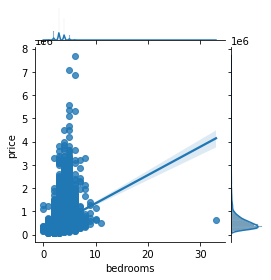

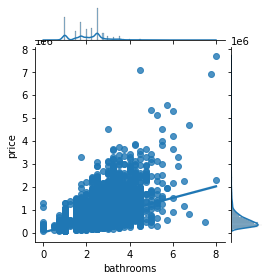

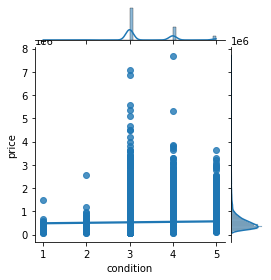

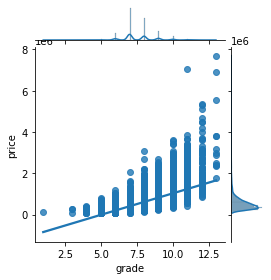

In [29]:
# Indivudal variable relationship with Price

# Linear regression between Year Built and price
sb.jointplot(x='yr_built', y='price',data=data,kind='reg',size=4)

# Linear regression between Year renovated and price
sb.jointplot(x='yr_renovated',y='price',data=data,kind='reg',size=4)


# Linear regression between Number of Bedrooms and price
sb.jointplot(x='bedrooms',y='price', data=data, kind='reg',size=4)

# Linear regression between Number of Bathrooms and price
sb.jointplot(x='bathrooms',y='price', data=data ,kind='reg',size=4)

# Linear regression between condition and price
sb.jointplot(x='condition',y='price', data=data ,kind='reg',size=4)

# Linear regression between grade and price
sb.jointplot(x='grade',y='price', data=data ,kind='reg',size=4)

<AxesSubplot:>

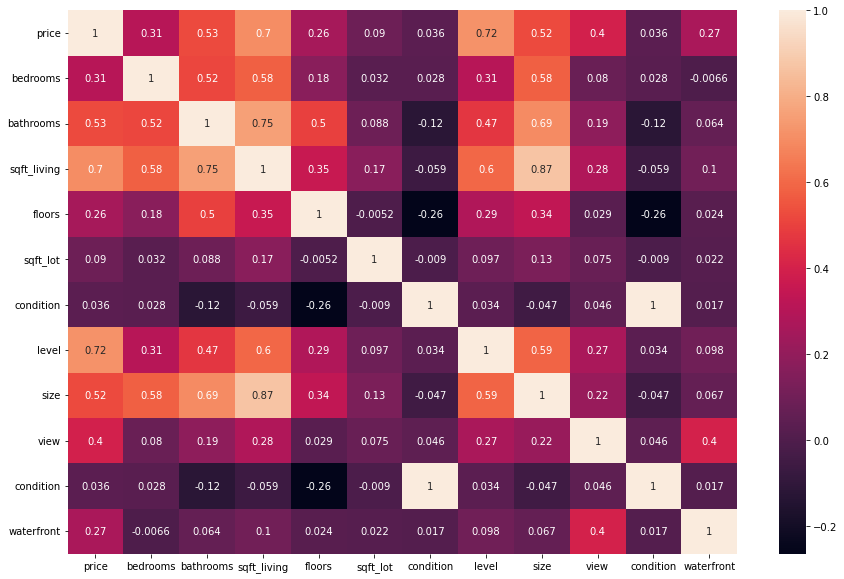

In [30]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','sqft_lot','yr_built','condition','yr_renovated','level','size','house_age','dormitory_type','view','condition','waterfront']
sb.heatmap(data[columns].corr(),annot=True)

<AxesSubplot:>

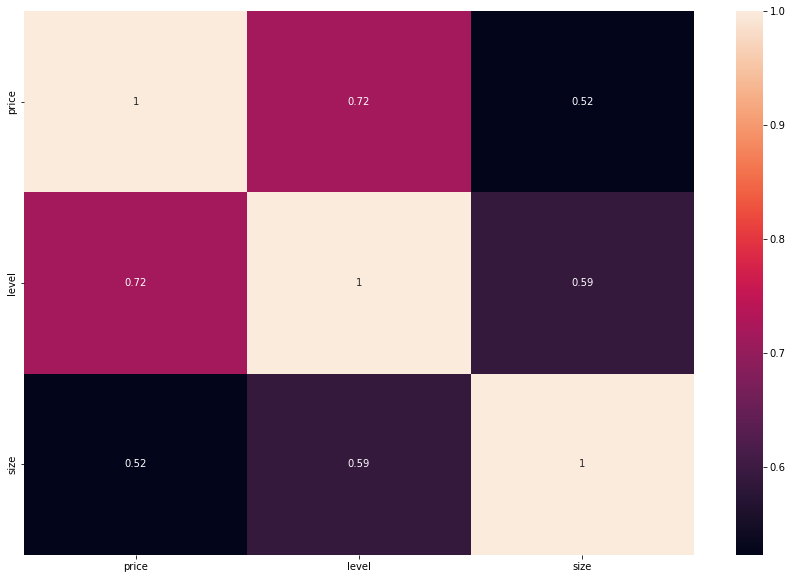

In [32]:
plt.figure(figsize=(15,10))
columns =['price','yr_built','yr_renovated','level','size','house_age','dormitory_type']
sb.heatmap(data[columns].corr(),annot=True)